# 1. Install and import dependencies

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

First, we need to clone the ultralytics yolov5 model to our local system

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Installing the dependencies in the requirements file in the yolov5 folder. The dependencies in the requirement file include the following libraries: 
matplotlib>=3.2.2

numpy>=1.18.5

opencv-python>=4.1.2

Pillow>=7.1.2

PyYAML>=5.3.1

requests>=2.23.0

scipy>=1.4.1

torch>=1.7.0

torchvision>=0.8.1

tqdm>=4.41.0

In [ ]:
!pip install -r requirements.txt

# 2. Load model
Loading the pre-trained ultralytics model from the torch hub.

The link for the torch hub model: https://pytorch.org/hub/ultralytics_yolov5/

Among the different Yolov5 model, we will be using the smaller version, namely Yolov5s for better performance and faster computations.

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Making detections

In [17]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/I-80_Eastshore_Fwy.jpg/1280px-I-80_Eastshore_Fwy.jpg'

In [18]:
results = model(img)

In [19]:
results.print()

image 1/1: 922x1280 35 cars, 2 trucks
Speed: 521.2ms pre-process, 32.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)


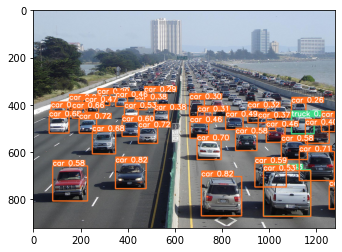

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Creating a custom dataset and Labelling
The custom dataset is as shown in the image folder of the repo. For this custom image dataset, labelling is done using the LabelImg repository from the github.

The link for the label image repo:https://github.com/tzutalin/labelImg

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# 5. Training the custom dataset

In [ ]:
pip install wandb

The dataset.yml consists of all the classes used for this project.

In [ ]:
!python train.py --img 320 --batch 5 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

# 6. Load the custom model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp11/weights/last.pt', force_reload=True)

In [ ]:
import os
img = os.path.join('data_scrap', 'test', 'mm.jpeg')

In [ ]:
results = model(img)

In [43]:
results.print()

image 1/1: 1500x2000 2 not scraps, 2 scraps
Speed: 62.8ms pre-process, 26.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


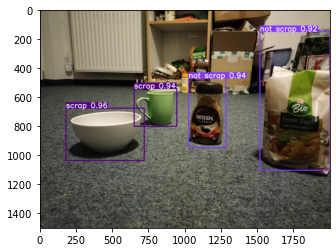

In [44]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [45]:
results.show()

In [46]:
cap = cv2.VideoCapture("./data_scrap/test/kk.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

